# Dataset Visualization
In this notebook we'll explore some of the key properties of the scGeneScope Dataset.

In order to run this notebook, please make sure you have downloaded the RNAseq and at least a single plate of the imaging data, as described in the README.md

In [1]:
!pip install scanpy
!pip install seaborn
!pip install matplotlib

  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 25.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.0 MB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 28.0 MB/s  0:00:00 eta 0:00:01
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 28.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 27.8 MB/s  0:00:00eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.1
    Uninstalling numpy-2.4.1:
      Successfully uninstalled numpy-2.4.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14/14 [scanpy]13/14 [scanpy]]earn]


In [2]:
import os
import json
from typing import Optional

import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Set plotting style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8  # Reducing font size from default

In [3]:
# Load the data
data_path = "../data/measured/"

gs_imaging_r1_path = os.path.join(data_path, "imaging/round_1.h5")
gs_imaging_r2_path = os.path.join(data_path, "imaging/round_2.h5")

gs_scrna_r1_path = os.path.join(data_path, "rnaseq/round_1.h5ad")
gs_scrna_r2_path = os.path.join(data_path, "rnaseq/round_2.h5ad")

gs_imaging_r1 = pd.read_hdf(gs_imaging_r1_path, key='manifest')
gs_imaging_r2 = pd.read_hdf(gs_imaging_r2_path, key='manifest')

gs_scrna_r1 = sc.read_h5ad(gs_scrna_r1_path, backed="r").obs
gs_scrna_r2 = sc.read_h5ad(gs_scrna_r2_path, backed="r").obs

# Print the shape of the loaded datasets
print(f"GeneScope Imaging R1 dataset shape: {gs_imaging_r1.shape}")
print(f"GeneScope Imaging R2 dataset shape: {gs_imaging_r2.shape}")
print(f"GeneScope scRNA R1 dataset shape: {gs_scrna_r1.shape}")
print(f"GeneScope scRNA R2 dataset shape: {gs_scrna_r2.shape}")

GeneScope Imaging R1 dataset shape: (449238, 33)
GeneScope Imaging R2 dataset shape: (267475, 33)
GeneScope scRNA R1 dataset shape: (406412, 18)
GeneScope scRNA R2 dataset shape: (221292, 18)


In [4]:
def print_dataset_stats(df: pd.DataFrame, dataset_name: Optional[str] = None) -> None:
    """
    Print basic statistics about a dataset including number of cells, unique treatments, and unique replicates.
    
    Args:
        df: DataFrame containing the dataset information
        dataset_name: Optional name of the dataset to include in the output
    """
    # Prepare dataset name string for output
    name_str = f"{dataset_name} " if dataset_name else ""
    
    # Count number of cells (rows)
    num_cells = len(df)
    
    # Count unique treatments if the column exists
    unique_treatments = df['Treatment'].nunique()
    treatment_col = 'Treatment'
    
    # Count unique replicates if the column exists
    unique_replicates = df['Replicate'].nunique()
    
    # Print the statistics
    print(f"{name_str}Dataset Statistics:")
    print(f"  - Number of cells: {num_cells}")
    print(f"  - Number of unique treatments: {unique_treatments}")
    print(f"  - Number of unique replicates: {unique_replicates}")
    
    # If treatment column exists, show the most common treatments
    print("\nMost common treatments:")
    print(df[treatment_col].value_counts().head(5))
    
    print("\n" + "-"*50 + "\n")

# Test the function with the GeneScope Imaging R1 dataset
print_dataset_stats(gs_imaging_r1, "GeneScope Imaging R1")
print_dataset_stats(gs_imaging_r2, "GeneScope Imaging R2")
print_dataset_stats(gs_scrna_r1, "GeneScope scRNA-seq R1")
print_dataset_stats(gs_scrna_r2, "GeneScope scRNA-seq R2")

GeneScope Imaging R1 Dataset Statistics:
  - Number of cells: 449238
  - Number of unique treatments: 29
  - Number of unique replicates: 3

Most common treatments:
Treatment
DMSO                   57888
Aloxistatin / E-64d    18867
PQ401                  17146
SKII                   15936
(R)-MG132              15932
Name: count, dtype: int64

--------------------------------------------------

GeneScope Imaging R2 Dataset Statistics:
  - Number of cells: 267475
  - Number of unique treatments: 29
  - Number of unique replicates: 2

Most common treatments:
Treatment
DMSO                                    35765
PD-98059                                11952
12-O-tetradecanoylphorbol-13-acetate    11092
SKII                                    10998
CGK-733                                 10821
Name: count, dtype: int64

--------------------------------------------------

GeneScope scRNA-seq R1 Dataset Statistics:
  - Number of cells: 406412
  - Number of unique treatments: 29
  - Number

/tmp/ipykernel_3761/368616735.py:37: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  merged_scrna['Treatment'] = merged_scrna['Treatment'].replace('12-O-tetradecanoylphorbol-13-acetate', 'PMA')
/tmp/ipykernel_3761/368616735.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scrna_counts = merged_scrna.groupby(['Treatment', 'Replicate']).size().reset_index(name='Cell Count')


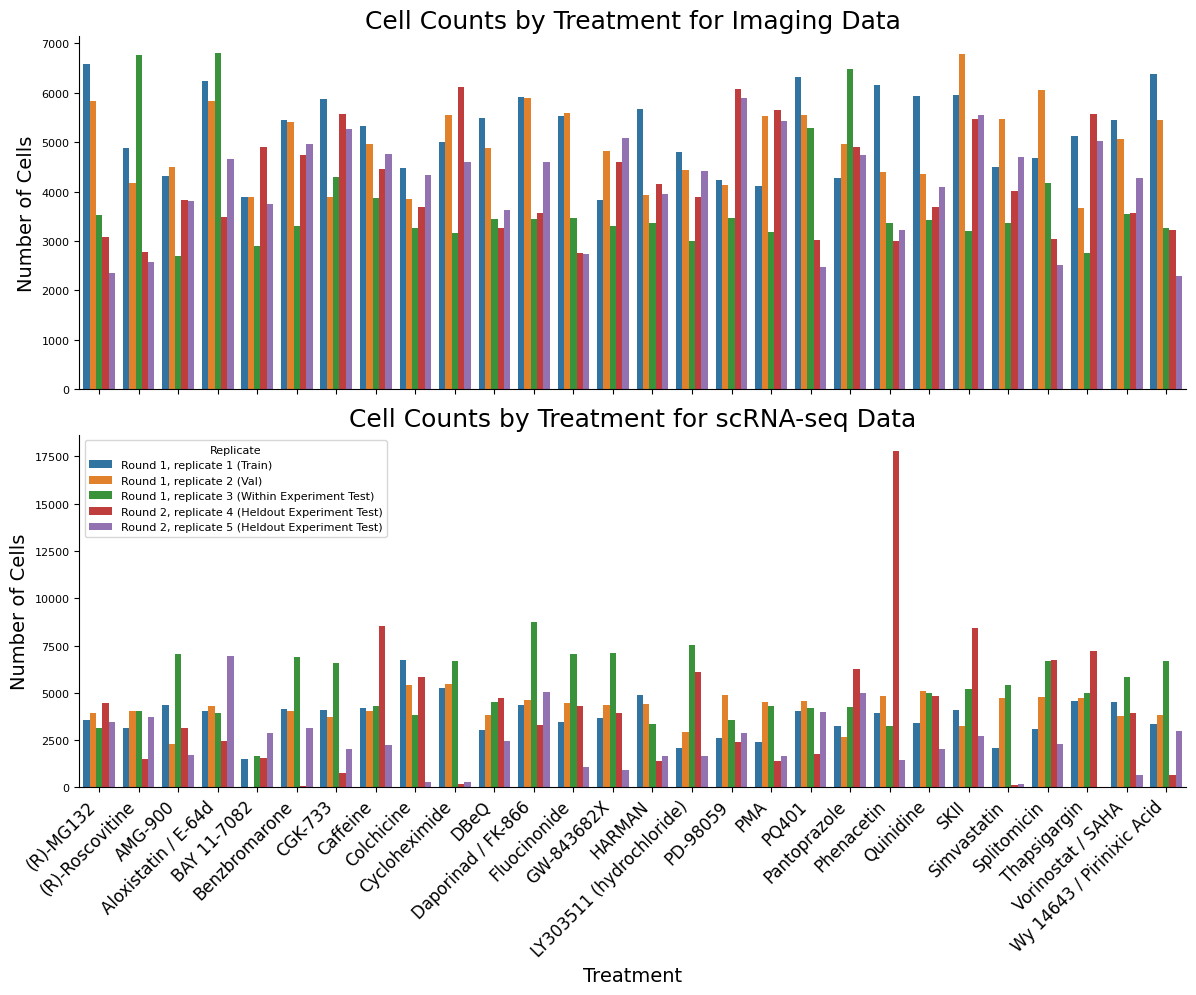

In [ ]:
def plot_cell_counts_by_treatment_and_replicate(imaging_df1, imaging_df2, scrna_df1, scrna_df2, replicate_map=None):
    """
    Plot the number of cells for each treatment, colored by replicate.
    Excludes DMSO treatments from the visualization.
    
    Args:
        imaging_df1: First imaging dataframe
        imaging_df2: Second imaging dataframe
        scrna_df1: First scRNA-seq dataframe
        scrna_df2: Second scRNA-seq dataframe
        replicate_map: Optional dictionary mapping replicate values to display names
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    
    # Merge the imaging dataframes
    imaging_df1['Dataset'] = 'Imaging R1'
    imaging_df2['Dataset'] = 'Imaging R2'
    merged_imaging = pd.concat([imaging_df1, imaging_df2])
    
    # Merge the scRNA-seq dataframes
    scrna_df1['Dataset'] = 'scRNA-seq R1'
    scrna_df2['Dataset'] = 'scRNA-seq R2'
    merged_scrna = pd.concat([scrna_df1, scrna_df2])
    
    # Filter out DMSO treatments
    merged_imaging = merged_imaging[~merged_imaging['Treatment'].str.contains('DMSO', case=False, na=False)]
    merged_scrna = merged_scrna[~merged_scrna['Treatment'].str.contains('DMSO', case=False, na=False)]
    
    # Ensure Replicate is treated as a categorical variable
    merged_imaging['Replicate'] = merged_imaging['Replicate'].astype(str)
    merged_scrna['Replicate'] = merged_scrna['Replicate'].astype(str)

    # Replace "12-O-tetradecanoylphorbol-13-acetate" with "PMA" in both dataframes, for plotting clarity
    merged_imaging['Treatment'] = merged_imaging['Treatment'].replace('12-O-tetradecanoylphorbol-13-acetate', 'PMA')
    merged_scrna['Treatment'] = merged_scrna['Treatment'].replace('12-O-tetradecanoylphorbol-13-acetate', 'PMA')
    
    # Apply replicate mapping if provided
    if replicate_map is not None:
        merged_imaging['Replicate'] = merged_imaging['Replicate'].map(replicate_map).fillna(merged_imaging['Replicate'])
        merged_scrna['Replicate'] = merged_scrna['Replicate'].map(replicate_map).fillna(merged_scrna['Replicate'])
    
    # Create a figure with two subplots sharing the x-axis
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    
    # Plot for imaging data
    imaging_counts = merged_imaging.groupby(['Treatment', 'Replicate']).size().reset_index(name='Cell Count')
    
    # Plot for scRNA-seq data
    scrna_counts = merged_scrna.groupby(['Treatment', 'Replicate']).size().reset_index(name='Cell Count')
    
    # Get the common set of treatments (excluding DMSO) to ensure consistent ordering
    all_treatments = sorted(set(imaging_counts['Treatment'].unique()) | set(scrna_counts['Treatment'].unique()))
    
    # Create order for the plots to ensure DMSO is truly excluded
    treatment_order = [t for t in all_treatments if 'DMSO' not in t]
    
    # Now plot with the explicit order
    sns.barplot(x='Treatment', y='Cell Count', hue='Replicate', data=imaging_counts, ax=ax1, order=treatment_order)
    ax1.set_title('Cell Counts by Treatment for Imaging Data', fontsize=18)
    ax1.set_ylabel('Number of Cells', fontsize=14)
    ax1.legend().remove()  # Remove legend from the first plot
    
    sns.barplot(x='Treatment', y='Cell Count', hue='Replicate', data=scrna_counts, ax=ax2, order=treatment_order)
    ax2.set_title('Cell Counts by Treatment for scRNA-seq Data', fontsize=18)
    ax2.set_xlabel('Treatment', fontsize=14)
    ax2.set_ylabel('Number of Cells', fontsize=14)
    ax2.legend(title='Replicate')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right', fontsize=12)
    
    # Despine the graph (remove top and right spines)
    sns.despine(fig=fig)
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

# this is the replicate mapping used for the original scGeneScope paper
replicate_map = {
    '1': 'Round 2, replicate 4 (Heldout Experiment Test)',
    '2': 'Round 2, replicate 5 (Heldout Experiment Test)',
    '3': 'Round 1, replicate 1 (Train)',
    '5': 'Round 1, replicate 2 (Val)',
    '4': 'Round 1, replicate 3 (Within Experiment Test)'
}

fig = plot_cell_counts_by_treatment_and_replicate(
    gs_imaging_r1, 
    gs_imaging_r2, 
    gs_scrna_r1, 
    gs_scrna_r2,
    replicate_map=replicate_map
)
# Save the figure as a PDF
plt.savefig('cell_counts_by_treatment.pdf', bbox_inches='tight', dpi=300)

plt.show()

# Generate a custom Croissant file

In [12]:
croissant_metadata = {
  "@context": {
    "@vocab": "https://schema.org/",                   
    "includes": "http://mlcommons.org/schema/includes" 
  },
  "@type": "Dataset",
  "name": "scGeneScope",
  "description": "A dataset comprising of Cell Painting microscopy images and single-cell RNA-seq data from U2OS cells subjected to 28 chemical perturbations.",
  "url": "https://huggingface.co/datasets/altoslabs/scGeneScope",
  "license": "https://creativecommons.org/licenses/by-nc/4.0/deed.en",
  "citation": "Anonymous Author(s) - Submitted to 39th Conference on Neural Information Processing Systems (NeurIPS 2025). Do not distribute.",
  "datePublished": "2025-05-15",
  "version": "1.0",
  "conformsTo": "http://mlcommons.org/croissant/1.0",
  "distribution": [
    {
      "@type": "https://schema.org/FileSet",
      "@id": "CellPainting_microscopy_images",
      "name": "CellPainting",
      "description": "Cell Painting microscopy images. There are two h5 dataframes at the contentUrl, round_1.h5 and round_2.h5 which contain the scGeneScope image manifests for each data generation round. Each row contains the path to all stains for that particular single cell image. The images are stored in the measured/imaging subdirectories, and mirror experimental design.",
      "encodingFormat": "image/tiff",
      "contentUrl": "https://huggingface.co/datasets/altoslabs/scGeneScope/tree/main/measured/imaging",
      "includes": [".h5", "*.tiff"]
    },{
      "@type": "https://schema.org/FileSet",
      "@id": "scRNAseq_data",
      "name": "scRNAseq",
      "description": "Processed single-cell RNA-seq data in h5ad format. There are two h5 dataframes, round_1.h5ad and round_2.h5ad which contain the scGeneScope rnaseq for each data generation round. The obs table of the .h5ad contains the cell_id, replicate, and treatment information.",
      "encodingFormat": "application/x-hdf5",
      "contentUrl": "https://huggingface.co/datasets/altoslabs/scGeneScope/tree/main/measured/rnaseq",
      "includes": ["*.h5ad"]
    }
  ],
  "recordSet": [
    {
      "@type": "cr:RecordSet",
      "name": "treatment_classification",
      "description": "Records for the treatment classification task across scRNA-seq and Cell Painting modalities. Records are sourced from four manifest files found in the distribution list, measured/imaging/round_1.h5 and measured/imaging/round_2.h5 for imaging, and measured/rnaseq/round_1.h5 and measured/rnaseq/round_2.h5 for scRNA-seq. The classification target is the 'Treatment' column. Splits are defined by the 'Replicate' column, and controlled dynamically by the scGeneScope library. The 'Group' column identifies whether a sample is a treatment or DMSO control; however, only the 'Treatment' column is used for prediction.",
      "field": [
        {
          "@type": "cr:Field",
          "name": "cell_id",
          "description": "Unique identifier for each sample.",
          "dataType": "string"
        },
        {
          "@type": "cr:Field",
          "name": "Treatment",
          "description": "Chemical perturbation applied to cells. This is the target label for the treatment classification task.",
          "dataType": "string"
        },
        {
          "@type": "cr:Field",
          "name": "Replicate",
          "description": "Replicate number (1-5), used for train/val/test splits. Split assignments are: 3 = train, 5 = validation, 4 = test, and 1+2 = alternate test set.",
          "dataType": "string"
        },
        {
          "@type": "cr:Field",
          "name": "batch",
          "description": "Batch identifier for the sample. Currently unused, but could be used for batch effects correction.",
          "dataType": "string"
        },
        {
          "@type": "cr:Field",
          "name": "Group",
          "description": "Indicates whether the sample is a treatment or DMSO control. Not used for classification.",
          "dataType": "string"
        }
      ]
    }
  ]
}

# Pretty print the Croissant metadata for better readability
import pprint

print("Croissant Metadata Structure:")
pprint.pprint(croissant_metadata, width=100, depth=4, compact=False)


# Save the Croissant metadata to a JSON file
output_file = os.path.join("croissant.json")

# Write the JSON to the output file
with open(output_file, 'w') as f:
    json.dump(croissant_metadata, f, indent=2)

print(f"Croissant metadata saved to {output_file}")

Croissant Metadata Structure:
{'@context': {'@vocab': 'https://schema.org/', 'includes': 'http://mlcommons.org/schema/includes'},
 '@type': 'Dataset',
 'citation': 'Anonymous Author(s) - Submitted to 39th Conference on Neural Information Processing '
             'Systems (NeurIPS 2025). Do not distribute.',
 'conformsTo': 'http://mlcommons.org/croissant/1.0',
 'datePublished': '2025-05-15',
 'description': 'A dataset comprising of Cell Painting microscopy images and single-cell RNA-seq '
                'data from U2OS cells subjected to 28 chemical perturbations.',
 'distribution': [{'@id': 'CellPainting_microscopy_images',
                   '@type': 'https://schema.org/FileSet',
                   'contentUrl': 'https://huggingface.co/datasets/altoslabs/scGeneScope/tree/main/measured/imaging',
                   'description': 'Cell Painting microscopy images. There are two h5 dataframes at '
                                  'the contentUrl, round_1.h5 and round_2.h5 which contain